In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmdtolba","key":"673c2a77db3050f1684f02ce08726ccc"}'}

In [2]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d janiobachmann/bank-marketing-dataset

  0% 0.00/142k [00:00<?, ?B/s]
100% 142k/142k [00:00<00:00, 62.1MB/s]


In [4]:
from zipfile import ZipFile
file_name='/content/bank-marketing-dataset.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
data = pd.read_csv('/content/bank.csv')


In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


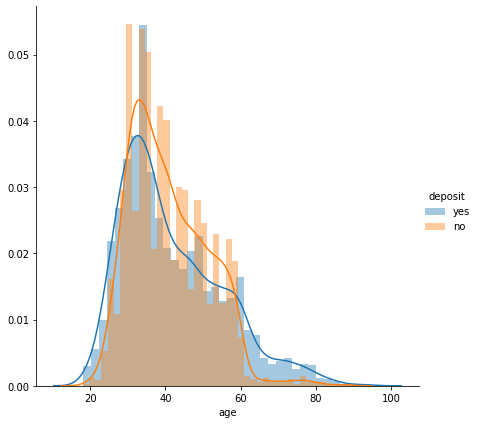

In [10]:
sns.FacetGrid(data=data,hue='deposit',size=6).map(sns.distplot,'age').add_legend()

In [14]:
numirical = data[['age','balance','day','duration','campaign','pdays','previous']]

In [15]:
categorial = data[['job','marital','education','housing','contact','month','poutcome','default','loan','deposit']]

In [16]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
categorial = categorial.apply(lab.fit_transform)

In [17]:
categorial

,job,marital,education,housing,contact,month,poutcome,default,loan,deposit
0,0,1,1,1,2,8,3,0,0,1
1,0,1,1,0,2,8,3,0,0,1
2,9,1,1,1,2,8,3,0,0,1
3,7,1,1,1,2,8,3,0,0,1
4,0,1,2,0,2,8,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11157,1,2,0,1,0,0,3,0,0,0
11158,7,1,1,0,2,6,3,0,0,0
11159,9,2,1,0,0,1,3,0,0,0
11160,9,1,1,0,0,8,0,0,1,0


In [18]:
data = numirical.join(categorial)

In [19]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,housing,contact,month,poutcome,default,loan,deposit
0,59,2343,5,1042,1,-1,0,0,1,1,1,2,8,3,0,0,1
1,56,45,5,1467,1,-1,0,0,1,1,0,2,8,3,0,0,1
2,41,1270,5,1389,1,-1,0,9,1,1,1,2,8,3,0,0,1
3,55,2476,5,579,1,-1,0,7,1,1,1,2,8,3,0,0,1
4,54,184,5,673,2,-1,0,0,1,2,0,2,8,3,0,0,1


In [20]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,housing,contact,month,poutcome,default,loan,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,4.487905,1.199337,1.285164,0.473123,0.489697,5.445709,2.477782,0.015051,0.130801,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,3.225132,0.625552,0.749478,0.499299,0.818724,3.191939,1.002952,0.121761,0.337198,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,7.000000,2.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,11.000000,2.000000,3.000000,1.000000,2.000000,11.000000,3.000000,1.000000,1.000000,1.000000


In [21]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,housing,contact,month,poutcome,default,loan,deposit
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,-0.031603,-0.442782,-0.126018,-0.168700,0.027762,-0.026130,-0.002699,-0.011425,-0.031418,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,0.028736,-0.002138,0.051728,-0.077092,-0.027295,0.007264,-0.027151,-0.060954,-0.084589,0.081129
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,0.026589,-0.003642,0.016759,-0.014770,0.007943,-0.019840,0.080221,0.017342,0.017269,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.002432,0.006781,-0.019122,0.035051,-0.018000,-0.006482,0.042171,-0.009760,-0.001914,0.451919
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,0.003104,-0.030794,-0.005327,0.006660,0.059258,-0.098123,0.112127,0.030975,0.034722,-0.128081
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,-0.003385,0.031200,0.025165,0.064497,-0.227785,0.033631,-0.806533,-0.036282,-0.030416,0.151593
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.012665,0.031281,0.022427,-0.000840,-0.169919,0.029283,-0.549333,-0.035273,-0.022668,0.139867
job,-0.031603,0.028736,0.026589,0.002432,0.003104,-0.003385,0.012665,1.000000,0.078314,0.147046,-0.136965,-0.087915,-0.076011,-0.004238,-0.007066,-0.067092,0.063395
marital,-0.442782,-0.002138,-0.003642,0.006781,-0.030794,0.031200,0.031281,0.078314,1.000000,0.125845,-0.036345,-0.060456,-0.004070,-0.039424,-0.014691,-0.062029,0.067610
education,-0.126018,0.051728,0.016759,-0.019122,-0.005327,0.025165,0.022427,0.147046,0.125845,1.000000,-0.109168,-0.132540,-0.055868,-0.040262,-0.010709,-0.073154,0.095948


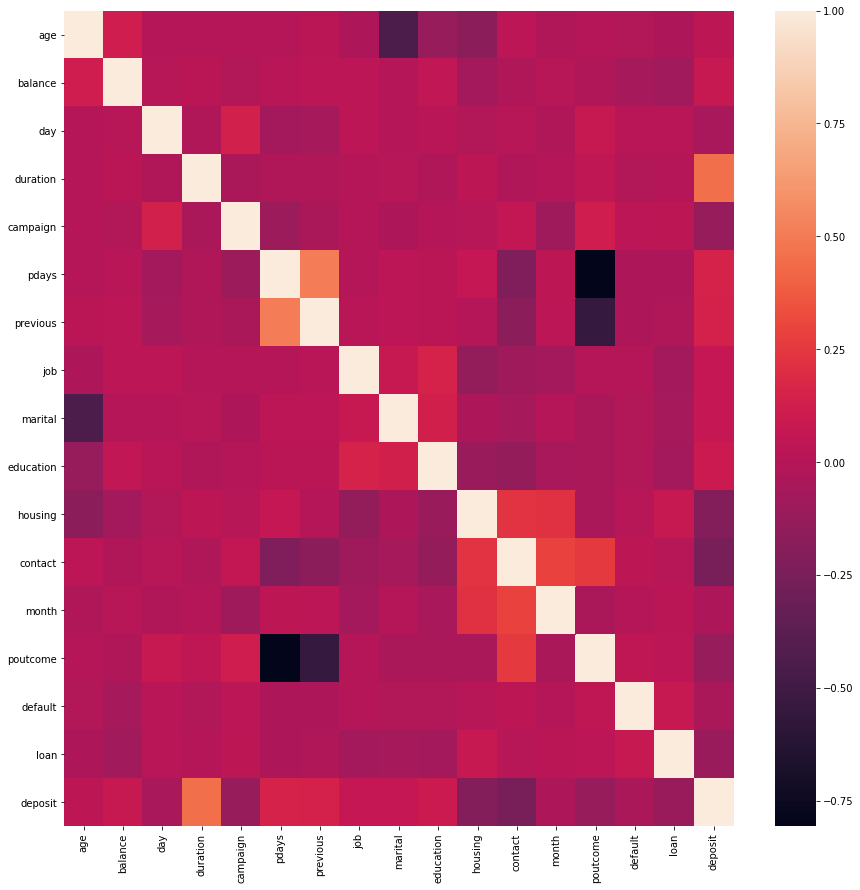

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr())

In [23]:
data = data.drop(["pdays" , "poutcome"] , axis=1)

Text(0.5, 1.0, 'Deposit vs  Balance')

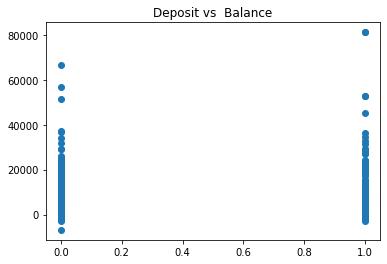

In [24]:
plt.scatter(data.deposit,data.balance)
plt.title("Deposit vs  Balance")

In [25]:
y = data['deposit']
X = data.drop(['deposit'] , axis=1)

In [26]:
# Import Libraries
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------

#----------------------------------------------------
#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
print('X \n' , X[:10])


X 
 [[ 1.49150488  0.25252514 -1.26574556  1.93022589 -0.55416834 -0.36325984
  -1.39160402 -0.31867191 -0.38050056  1.05527951  1.8447863   0.80026761
  -0.12361659 -0.38792323]
 [ 1.23967567 -0.4599736  -1.26574556  3.15461161 -0.55416834 -0.36325984
  -1.39160402 -0.31867191 -0.38050056 -0.94761624  1.8447863   0.80026761
  -0.12361659 -0.38792323]
 [-0.0194704  -0.0801603  -1.26574556  2.92990082 -0.55416834 -0.36325984
   1.39910458 -0.31867191 -0.38050056  1.05527951  1.8447863   0.80026761
  -0.12361659 -0.38792323]
 [ 1.1557326   0.29376202 -1.26574556  0.59636568 -0.55416834 -0.36325984
   0.77894711 -0.31867191 -0.38050056  1.05527951  1.8447863   0.80026761
  -0.12361659 -0.38792323]
 [ 1.07178952 -0.41687642 -1.26574556  0.86717099 -0.18678537 -0.36325984
  -1.39160402 -0.31867191  0.95382154 -0.94761624  1.8447863   0.80026761
  -0.12361659 -0.38792323]
 [ 0.06447267 -0.47392593 -1.26574556  0.54739025 -0.18678537 -0.36325984
  -0.15128909  1.27998692  0.95382154  1.055279

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True, random_state=42)



In [33]:
#Import Libraries
from sklearn.linear_model import SGDClassifier
#----------------------------------------------------

#----------------------------------------------------
#Applying SGDClassifier Model 



SGDClassifierModel = SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=33)
SGDClassifierModel.fit(X_train, y_train)

#Calculating Details
print('SGDClassifierModel Train Score is : ' , SGDClassifierModel.score(X_train, y_train))
print('SGDClassifierModel Test Score is : ' , SGDClassifierModel.score(X_test, y_test))
#print('SGDClassifierModel loss function is : ' , SGDClassifierModel.loss_function_)
#print('SGDClassifierModel No. of iteratios is : ' , SGDClassifierModel.n_iter_)


SGDClassifierModel Train Score is :  0.7305429259160203
SGDClassifierModel Test Score is :  0.7326275787187839


In [34]:
#Import Libraries
from sklearn.linear_model import LogisticRegression
#----------------------------------------------------

#----------------------------------------------------
#Applying LogisticRegression Model 



LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
#print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
#print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
#print('----------------------------------------------------')



LogisticRegressionModel Train Score is :  0.7945974859588125
LogisticRegressionModel Test Score is :  0.7866449511400652


In [36]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [0 1 1 1 0 1 0 0 1 1]
Prediction Probabilities Value for LogisticRegressionModel is :  [[0.52702693 0.47297307]
 [0.03977478 0.96022522]
 [0.33705837 0.66294163]
 [0.05741587 0.94258413]
 [0.94871559 0.05128441]
 [0.21838962 0.78161038]
 [0.84736714 0.15263286]
 [0.94377449 0.05622551]
 [0.4245778  0.5754222 ]
 [0.1228227  0.8771773 ]]


Confusion Matrix is : 
 [[1587  330]
 [ 456 1311]]


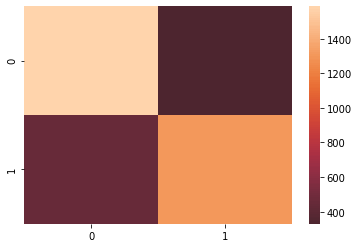

In [38]:
#Import Libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()